Notebook structure:
- 1. Importing libraries
- 2. Loading the dataset
- 3. Exploratory Data Analysis
- 4. Data Preprocessing
- 5. Model Training
- 6. Model Evaluation
- 8. Conclusion Todo

## 1. Importing libraries

In [148]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing, tree, metrics, model_selection, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import tensorflow as tf
import datetime
import random


# Lois
from lois import lois_ds_report
%matplotlib inline

## 2. Loading the dataset

In [149]:
train_data = pd.read_csv('data/training_data.csv')
test_data = pd.read_csv('data/test_data.csv')

# Add a "fake target" column to the test data
test_data['incidents'] = "test-only"

# Concatenate the training and test data
dataset = pd.concat([train_data, test_data], axis=0)

## 3. Exploratory Data Analysis

╭─────────────────────────────────────────── Exploratory Data Anlysis ────────────────────────────────────────────╮
│                                                                                                                 │
╰──────────────────────────────────── EDA|simple| Suitable for data scientist ────────────────────────────────────╯

Shape Analysis
┗━━ Dataset Shape Analysis
    ┣━━ Dataset head
    ┣━━ General info 
    ┣━━ The target variable
    ┣━━ Number of rows and columns
    ┣━━ The different data types
    ┃   ┣━━ The sum of different variable type
    ┃   ┗━━ Visual representation of different variable type
    ┗━━ Analyze missing value
        ┣━━ The percentage of missing value in each columns
        ┣━━ The missing value counts
        ┗━━ Visual representation of missing value

╭──────────────────────────────────────────── DATASET SHAPE ANALYSIS ─────────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

-------------------- THE HEAD OF YOUR DATASET --------------------

Your dataset is too large ; only the first 8 columns will be display

                                                    The Dataset                                                    
┏━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ city… ┃ magnitude_of_… ┃ delay_in_se… ┃ affected_… ┃ record… ┃ lumin… ┃ avg_tempera… ┃ avg_atm_pre… ┃ avg_humi… ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
└───────┴────────────────┴──────────────┴────────────┴─────────┴────────┴──────────────┴──────────────┴───────────┘

-------------------- SOME GENERAL INFO ABOUT YOUR DATASET --------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 0 to 1205
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           6206 non-null   object 
 1   magnitude_of_delay  6206 non-null   object 
 2   delay_in_seconds    6206 non-null   int64  
 3   affected_roads      6099 non-null   object 
 4   record_date         6206 non-null   object 
 5   luminosity          6206 non-null   object 
 6   avg_temperature     6206 non-null   float64
 7   avg_atm_pressure    6206 non-null   float64
 8   avg_humidity        6206 non-null   float64
 9   avg_wind_speed      6206 non-null   float64
 10  avg_precipitation   6206 non-null   float64
 11  avg_rain            6206 non-null   object 
 12  incidents           6206 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 678.8+ KB


-------------------- THE TARGET VARIABLE OF YOUR DATASET --------------------

╭───────────────────────────────────────╮
│ The Target variable is : 'incidents'  │
╰───────────────────────────────────────╯

-------------------- ROWS AND COLUMNS IN YOUR DATASET --------------------

╭─ Shape output ─╮
│ (6206, 13)     │
╰────────────────╯

╭────────────────────────────────────────────────╮
│ Your dataset contains 6206 Rows and 13 Columns │
╰────────────────────────────────────────────────╯

-------------------- THE DATA TYPES IN YOUR DATASET --------------------

╭─ Data types output ─╮
│ object     7        │
│ float64    5        │
│ int64      1        │
│ dtype: int64        │
╰─────────────────────╯

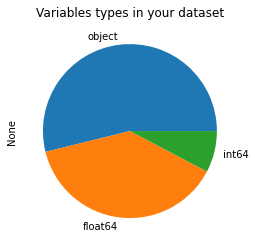

-------------------- MISSING VALUE IN YOUR DATASET --------------------

╭───── Missing value output ─────╮
│ city_name             0.000000 │
│ magnitude_of_delay    0.000000 │
│ delay_in_seconds      0.000000 │
│ record_date           0.000000 │
│ luminosity            0.000000 │
│ avg_temperature       0.000000 │
│ avg_atm_pressure      0.000000 │
│ avg_humidity          0.000000 │
│ avg_wind_speed        0.000000 │
│ avg_precipitation     0.000000 │
│ avg_rain              0.000000 │
│ incidents             0.000000 │
│ affected_roads        0.017241 │
│ dtype: float64                 │
╰────────────────────────────────╯

╭─ Missing value counts output ─╮
│ 0.017241     1                │
│ 0.000000    12                │
│ dtype: int64                  │
╰───────────────────────────────╯

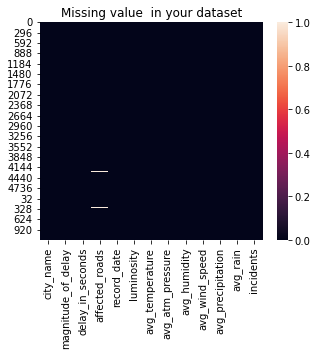

#################### END ####################

In [150]:
lois_ds_report(dataset,target_variable="incidents")

In [151]:
dataset.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [152]:
dataset.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.0
mean,561.444086,14.595875,1018.121656,74.340477,1.268853,0.0
std,1667.344871,4.795352,5.206504,17.204386,1.283545,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,240.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


## 4. Data Preprocessing

## Drop unecessary columns

In [153]:
# Drop city name and avg_precipitation: always the same value
dataset.drop('avg_precipitation', axis=1, inplace=True)
dataset.drop('city_name', axis=1, inplace=True)

### Look for any Duplicated Rows

In [154]:
# Is there any duplicated data?
print("Number of duplicated rows: {}".format(dataset.duplicated().sum()))

Number of duplicated rows: 0


#### Handle Affected Roads

In [155]:
# Column affected_roads is a list of roads that are affected by the incident.
# Replace this column with the number of roads affected by the incident.
# Iterate over the number of affected roads of each incident.
def replace_affected_roads(data):
    
    for index, row in data.iterrows():
        # Check if the value is NaN
        split_roads = []
        if not pd.isnull(row['affected_roads']):
            split_roads = row['affected_roads'].split(',')
        
        # Remove empty strings
        split_roads = list(filter(None, split_roads))
        
        # Remove duplicates
        split_roads = list(dict.fromkeys(split_roads))
        
        data.at[index, 'affected_roads'] = len(split_roads)
        
    # Rename column
    data['affected_roads'] = data['affected_roads'].astype('int64')
    data.rename(columns={'affected_roads': 'number_of_affected_roads'}, inplace=True)
    
    return data

if 'affected_roads' in dataset.columns:
    dataset = replace_affected_roads(dataset)

### Handle Categorical data

###  Turn nominal values to numeric

In [156]:
dict_magnitude_of_delay = {'UNDEFINED': 0, 'MODERATE':1, 'MAJOR':3}
dataset['magnitude_of_delay'] = dataset['magnitude_of_delay'].map(dict_magnitude_of_delay)

dict_luminosity = {'LOW_LIGHT': 0, 'LIGHT':1, 'DARK':2}
dataset['luminosity'] = dataset['luminosity'].map(dict_luminosity)

dict_avg_rain = {'Sem Chuva': 0, 'chuva fraca': 1, 'chuva moderada': 2, 'chuva forte': 3}
dataset['avg_rain'] = dataset['avg_rain'].map(dict_avg_rain)

#### categorizing time of day

In [157]:
# Use the hour and month value as continuous variables
# Create a binary variable for weekend or not
def create_time_variables(dataset):
    #add 2 column with the month and day from time_of_day
    dataset['month'] = pd.DatetimeIndex(dataset['record_date']).month
    dataset['day'] = pd.DatetimeIndex(dataset['record_date']).day
    return dataset


dataset = create_time_variables(dataset)

dataset.drop('record_date', axis=1, inplace=True)

<AxesSubplot:>

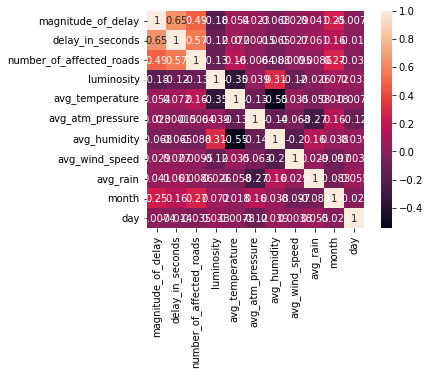

In [158]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,square=True, annot=True)

## 5. Models Training

In [159]:
results_table = []
results_dict = []

#### Helper Functions

In [160]:
""" Save results to a file. """
def saveResults ( results, path ):
    file = open("results/" + path, 'w')
    file.write ("RowId,Incidents\n")
    i = 1
    for result in results :
        file.write (str(i) + "," + result + "\n")
        i += 1

In [161]:
def printOrWrite(model_name, predictions, results, results_to_test):
    if results_to_test:
        classification = metrics.classification_report(results, predictions, zero_division=0)
        results_table.append({'model': model_name, 'table': classification})
        classification_dict = metrics.classification_report(results, predictions, output_dict=True, zero_division=0)
        results_dict.append({
            'model': model_name,
            'accuracy': classification_dict['accuracy'],
            'precision': classification_dict['macro avg']['precision'],
            'recall': classification_dict['macro avg']['recall'],
            'f1-score': classification_dict['macro avg']['f1-score'],
            })
        print(model_name, " Accuracy: ", metrics.accuracy_score(predictions, results))
    else:
        saveResults(predictions, model_name + '.csv')

#### Splitting the dataset

In [162]:
# run for test or run for submission
results_to_test = True

# Copy the dataset
train_df = dataset.copy()
test_df = dataset.copy()

# Filter the train and test data
# Train data has the 'incidents' column value != 'test-only'
# Test data has the 'incidents' column value == 'test-only'
train_df = train_df[train_df['incidents'] != 'test-only']
test_df = test_df[test_df['incidents'] == 'test-only']
test_df.drop('incidents', axis=1, inplace=True)

incidents = train_df['incidents'].copy()

if results_to_test:
    y = incidents
    x = train_df.drop(['incidents'], axis=1)
    x_training, x_testing, y_training, y_testing = model_selection.train_test_split(x, y, test_size=0.5, random_state=2022)

else:
    x_training = train_df.drop(['incidents'], axis=1)
    y_training = incidents
    x_testing = test_df
    y_testing = None

### 5.1 Árvores de Decisão e Classificação

In [163]:
dtc = tree.DecisionTreeClassifier(random_state=2023, criterion="gini", max_depth=10)
dtc.fit(x_training,y_training)
decision_trees_predictions = dtc.predict(x_testing)

printOrWrite("DecisionTrees", decision_trees_predictions, y_testing, results_to_test)

DecisionTrees  Accuracy:  0.8908


### 5.2 RandomForestClassifier

In [164]:
random_forest = RandomForestClassifier(n_estimators=600, random_state=2023)
random_forest.fit(x_training, y_training)
random_forest_predictions = random_forest.predict(x_testing)

printOrWrite("RandomForest", random_forest_predictions, y_testing, results_to_test)

RandomForest  Accuracy:  0.8956


### 5.3 Regressão Logística

In [165]:
logmodel = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodel.fit(x_training,y_training)
logistic_regression_predictions = logmodel.predict(x_testing)

printOrWrite("LogisticRegression", logistic_regression_predictions, y_testing, results_to_test)

LogisticRegression  Accuracy:  0.576


### 5.4 SVC

In [166]:
model = SVC(random_state=2023)
model.fit(x_training, y_training)
hold_out_predictions = model.predict(x_testing)

printOrWrite("SVC", hold_out_predictions, y_testing, results_to_test)

SVC  Accuracy:  0.5484


### 5.6 KNeighborsClassifier

In [167]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_training, y_training)
knn_predictions = knn.predict(x_testing)

printOrWrite("KNN", knn_predictions, y_testing, results_to_test)

KNN  Accuracy:  0.736


### 5.7 MLPClassifier

In [168]:
mlpclass = MLPClassifier(alpha=1, max_iter=1000)
mlpclass.fit(x_training, y_training)
mlpclass_predictions = mlpclass.predict(x_testing)

printOrWrite("MLPClassifier", mlpclass_predictions, y_testing, results_to_test)

MLPClassifier  Accuracy:  0.5544


### 5.8 AdaBoostClassifier

In [169]:
adaBoost = AdaBoostClassifier(n_estimators=100, random_state=2023)
adaBoost.fit(x_training, y_training)
adaBoost_predictions = adaBoost.predict(x_testing)

printOrWrite("AdaBoost", adaBoost_predictions, y_testing, results_to_test)

AdaBoost  Accuracy:  0.71


### 5.9 GaussianNB

In [170]:
gaussianNB = GaussianNB()
gaussianNB.fit(x_training, y_training)
gaussianNB_predictions = gaussianNB.predict(x_testing)

printOrWrite("GaussianNB", gaussianNB_predictions, y_testing, results_to_test)

GaussianNB  Accuracy:  0.524


### 5.10 QuadraticDiscriminantAnalysis

In [171]:
quadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()
quadraticDiscriminantAnalysis.fit(x_training, y_training)
quadraticDiscriminantAnalysis_predictions = quadraticDiscriminantAnalysis.predict(x_testing)

printOrWrite("QuadraticDiscriminantAnalysis", quadraticDiscriminantAnalysis_predictions, y_testing, results_to_test)

QuadraticDiscriminantAnalysis  Accuracy:  0.5708


### 5.11 GaussianProcessClassifier

In [172]:
gaussian = GaussianProcessClassifier(n_restarts_optimizer=3, max_iter_predict=100, random_state=2023)
gaussian.fit(x_training, y_training)
gaussian_predictions = gaussian.predict(x_testing)

printOrWrite("GaussianProcessClassifier", gaussian_predictions, y_testing, results_to_test)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ <ipython-input-172-502ce00a2407>:2 in <module>                                                   │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/gaussian_process/_gpc.py:664   │
│ in fit                                                                                           │
│                                                                                                  │
│   661 │   │   │   │   raise ValueError("Unknown multi-class mode %s"                             │
│   662 │   │   │   │   │   │   │   │    % self.multi_class)                                       │
│   663 │   │                                                                                      │
│ ❱ 664 │   │   self.base_estimator_.fit(X, y)                                                     │
│   665 │   │                                                                                      │
│   666 │   │   if self.n_classes_ > 2:                                                            │
│   667 │   │   │   self.log_marginal_likelihood_value_ = np.mean(                                 │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/multiclass.py:285 in fit       │
│                                                                                                  │
│   282 │   │   │   self.estimator, X, column, classes=[                                           │
│   283 │   │   │   │   "not %s" % self.label_binarizer_.classes_[i],                              │
│   284 │   │   │   │   self.label_binarizer_.classes_[i]])                                        │
│ ❱ 285 │   │   │   for i, column in enumerate(columns))                                           │
│   286 │   │                                                                                      │
│   287 │   │   return self                                                                        │
│   288                                                                                            │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/joblib/parallel.py:1041 in __call__    │
│                                                                                                  │
│   1038 │   │   │   # was very quick and its callback already dispatched all the                  │
│   1039 │   │   │   # remaining jobs.                                                             │
│   1040 │   │   │   self._iterating = False                                                       │
│ ❱ 1041 │   │   │   if self.dispatch_one_batch(iterator):                                         │
│   1042 │   │   │   │   self._iterating = self._original_iterator is not None                     │
│   1043 │   │   │                                                                                 │
│   1044 │   │   │   while self.dispatch_one_batch(iterator):                                      │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/joblib/parallel.py:859 in              │
│ dispatch_one_batch                                                                               │
│                                                                                                  │
│    856 │   │   │   │   # No more tasks available in the iterator: tell caller to stop.           │
│    857 │   │   │   │   return False                                                              │
│    858 │   │   │   else:                                   

### 5.12 Grid Search

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(random_state=2022), param_grid, refit=True, verbose=3)
grid.fit(x_training, y_training)
grid_predictions = grid.predict(x_testing)

printOrWrite("GridSearchCV", grid_predictions, y_testing, results_to_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.404 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.406 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.406 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.406 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.406 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.404 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.406 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ <ipython-input-147-7c8e58ebbcdc>:3 in <module>                                                   │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/utils/validation.py:63 in      │
│ inner_f                                                                                          │
│                                                                                                  │
│     60 │   │   def inner_f(*args, **kwargs):                                                     │
│     61 │   │   │   extra_args = len(args) - len(all_args)                                        │
│     62 │   │   │   if extra_args <= 0:                                                           │
│ ❱   63 │   │   │   │   return f(*args, **kwargs)                                                 │
│     64 │   │   │                                                                                 │
│     65 │   │   │   # extra_args > 0                                                              │
│     66 │   │   │   args_msg = ['{}={}'.format(name, arg)                                         │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841 │
│ in fit                                                                                           │
│                                                                                                  │
│    838 │   │   │   │                                                                             │
│    839 │   │   │   │   return results                                                            │
│    840 │   │   │                                                                                 │
│ ❱  841 │   │   │   self._run_search(evaluate_candidates)                                         │
│    842 │   │   │                                                                                 │
│    843 │   │   │   # multimetric is determined here because in the case of a callable            │
│    844 │   │   │   # self.scoring the return type is only known after calling                    │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/model_selection/_search.py:129 │
│ 6 in _run_search                                                                                 │
│                                                                                                  │
│   1293 │                                                                                         │
│   1294 │   def _run_search(self, evaluate_candidates):                                           │
│   1295 │   │   """Search all candidates in param_grid"""                                         │
│ ❱ 1296 │   │   evaluate_candidates(ParameterGrid(self.param_grid))                               │
│   1297                                                                                           │
│   1298                                                                                           │
│   1299 class RandomizedSearchCV(BaseSearchCV):                                                   │
│                                                                                                  │
│ /home/lcmj/anaconda3/envs/daa/lib/python3.6/site-packages/sklearn/model_selection/_search.py:809 │
│ in evaluate_candidates                                                                           │
│                                                                                                  │
│    806 │   │   │   │   │   │   │      for (cand_idx, parame

### 5.13 Maquinas de Vectores de Suporte (SVM)

In [ ]:
df_feat = pd.DataFrame(x_training, columns=x_training.columns)
df_target = pd.DataFrame(y_training, columns=['incidents'])
# 10-Fold Cross Validation
cross_valid_model = SVC(random_state=2022)
cross_val_score(cross_valid_model, df_feat, np.ravel(df_target), cv=10)

printOrWrite("CrossValidation", grid_predictions, y_testing, results_to_test)

CrossValidation  Accuracy:  0.7304


### 5.14 Neural Network

In [ ]:
# Data: x_training, x_testing, y_training, y_testing
#
# Encode the labels
encoder = LabelEncoder()  
y_training_labeled = encoder.fit_transform(y_training)
y_training_labeled = tf.keras.utils.to_categorical(y_training_labeled)

# If the submission is for kaggle, y_testing does not exist.
# Otherwise, we need to encode the labels.
if results_to_test:
    y_testing_labeled = encoder.fit_transform(y_testing)
    y_testing_labeled = tf.keras.utils.to_categorical(y_testing_labeled)

# Define the model
model = tf.keras.Sequential()

# Add a hidden layer with 16 units and ReLU activation
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(x_training.shape[1],)))

# Add a hidden layer with 32 units and ReLU activation
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add a hidden layer with 64 units and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add a hidden layer with 128 units and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Add a hidden layer with 64 units and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add a hidden layer with 32 units and ReLU activation
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add a hidden layer with 16 units and ReLU activation
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Add an output layer with 5 units and softmax activation
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Compile the model with categorical crossentropy loss and an Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(x_training, y_training_labeled, epochs=200, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
if results_to_test:
    loss, accuracy = model.evaluate(x_testing, y_testing_labeled)
    print("Neural Network Accuracy: ", accuracy)

Epoch 1/200
71/71 [==============================] - 1s 4ms/step - loss: 2.7901 - accuracy: 0.4467 - val_loss: 1.4203 - val_accuracy: 0.4240
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 1.2842 - accuracy: 0.5236 - val_loss: 1.4556 - val_accuracy: 0.4680
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 1.2709 - accuracy: 0.5284 - val_loss: 1.2433 - val_accuracy: 0.4920
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 1.2489 - accuracy: 0.5293 - val_loss: 1.2730 - val_accuracy: 0.5040
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 1.2140 - accuracy: 0.5507 - val_loss: 1.2331 - val_accuracy: 0.4880
Epoch 6/200
71/71 [==============================] - 0s 3ms/step - loss: 1.2328 - accuracy: 0.5298 - val_loss: 1.2401 - val_accuracy: 0.5080
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 1.2182 - accuracy: 0.5422 - val_loss: 1.2050 - val_accuracy: 0.5040
Epoch 8/200
7

## 6. Model Evaluation

In [ ]:
results_plot = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for row in results_dict:
    results_plot = results_plot.append({
        'Model': row['model'],
        'Accuracy': row['accuracy'],
        'Precision': row['precision'],
        'Recall': row['recall'],
        'F1-Score': row['f1-score']
        }, ignore_index=True)

Text(0, 0.5, 'Accuracy')

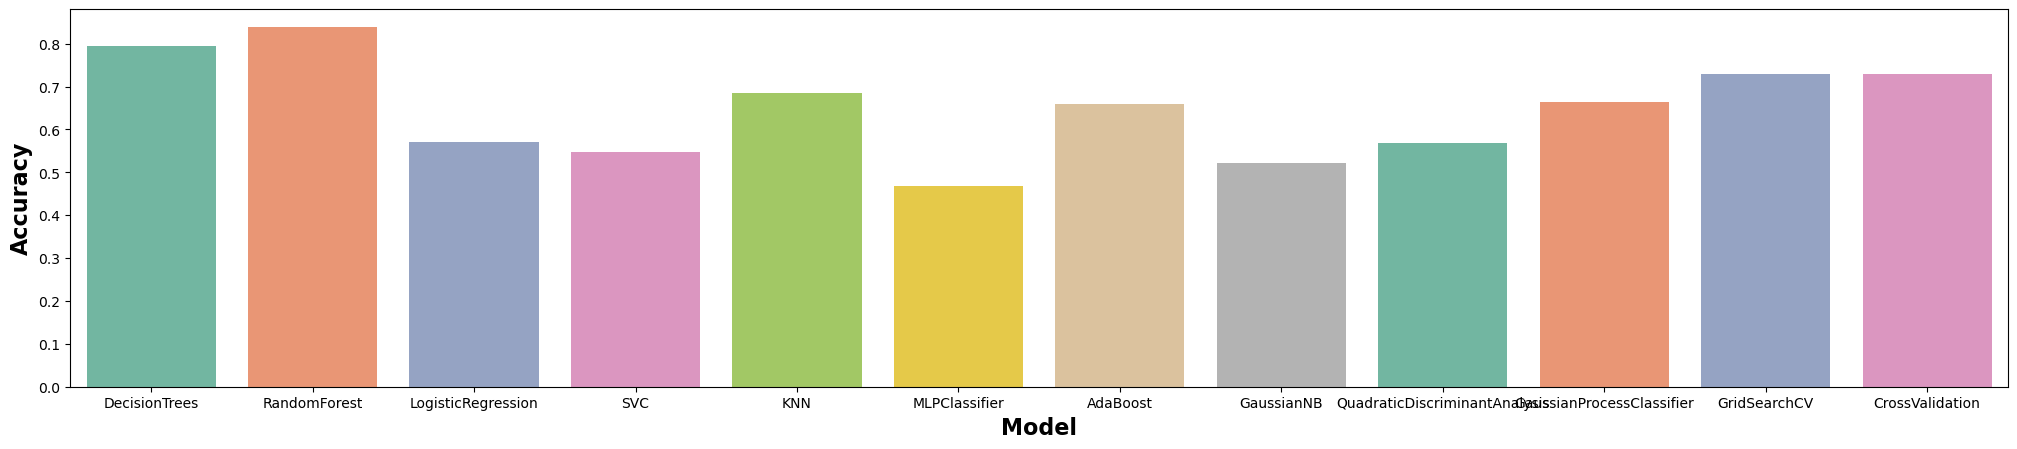

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Accuracy'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Accuracy', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Precision')

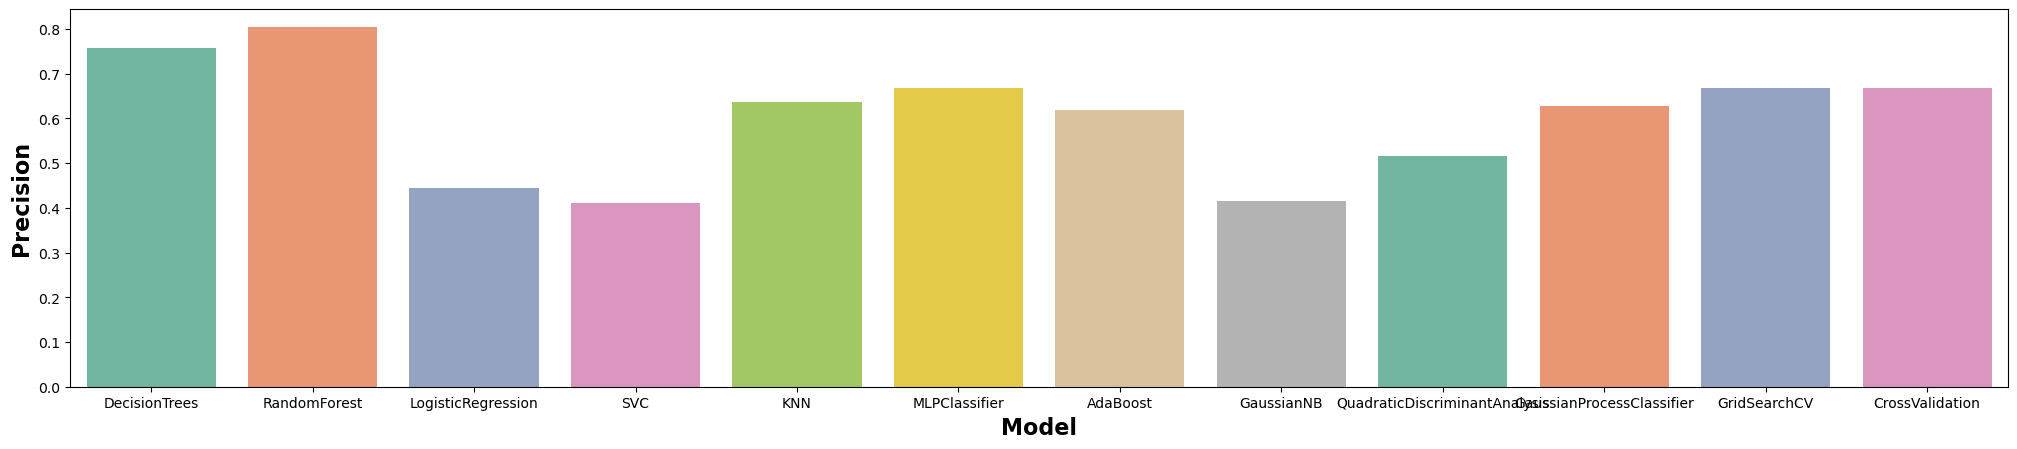

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Precision'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Precision', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Recall')

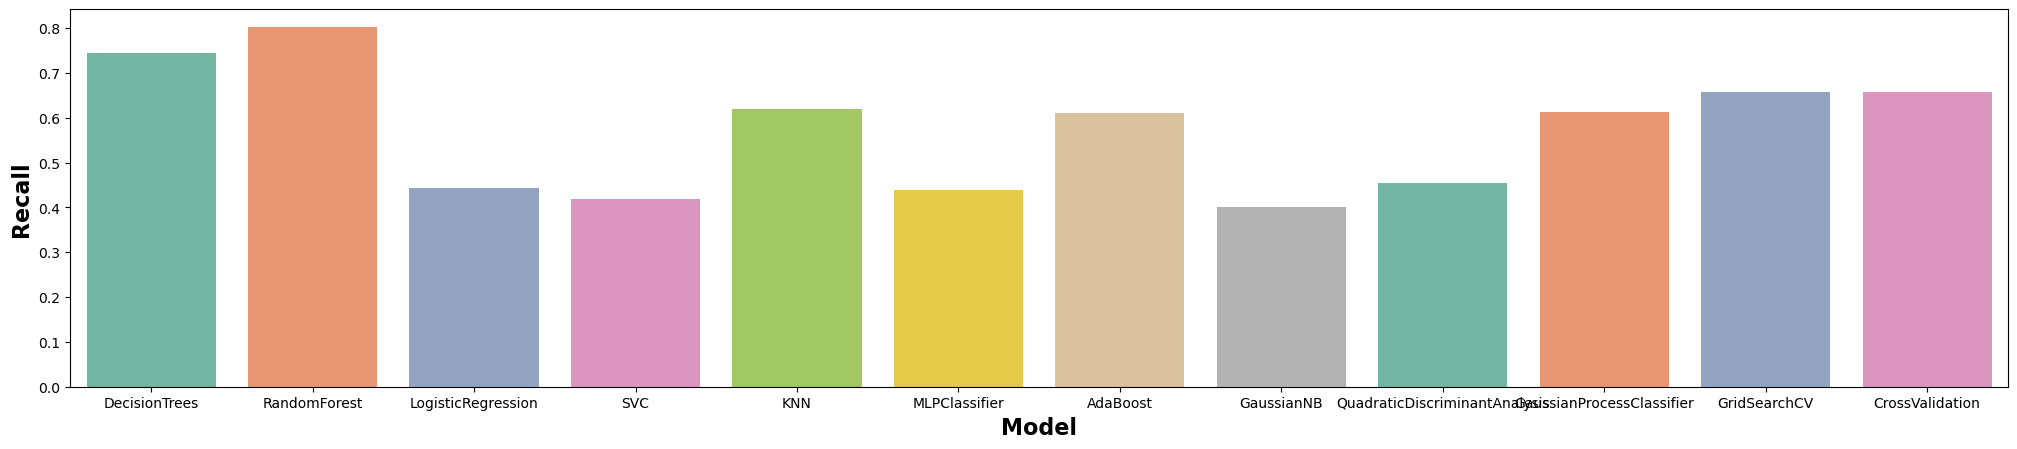

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Recall'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Recall', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'F1-Score')

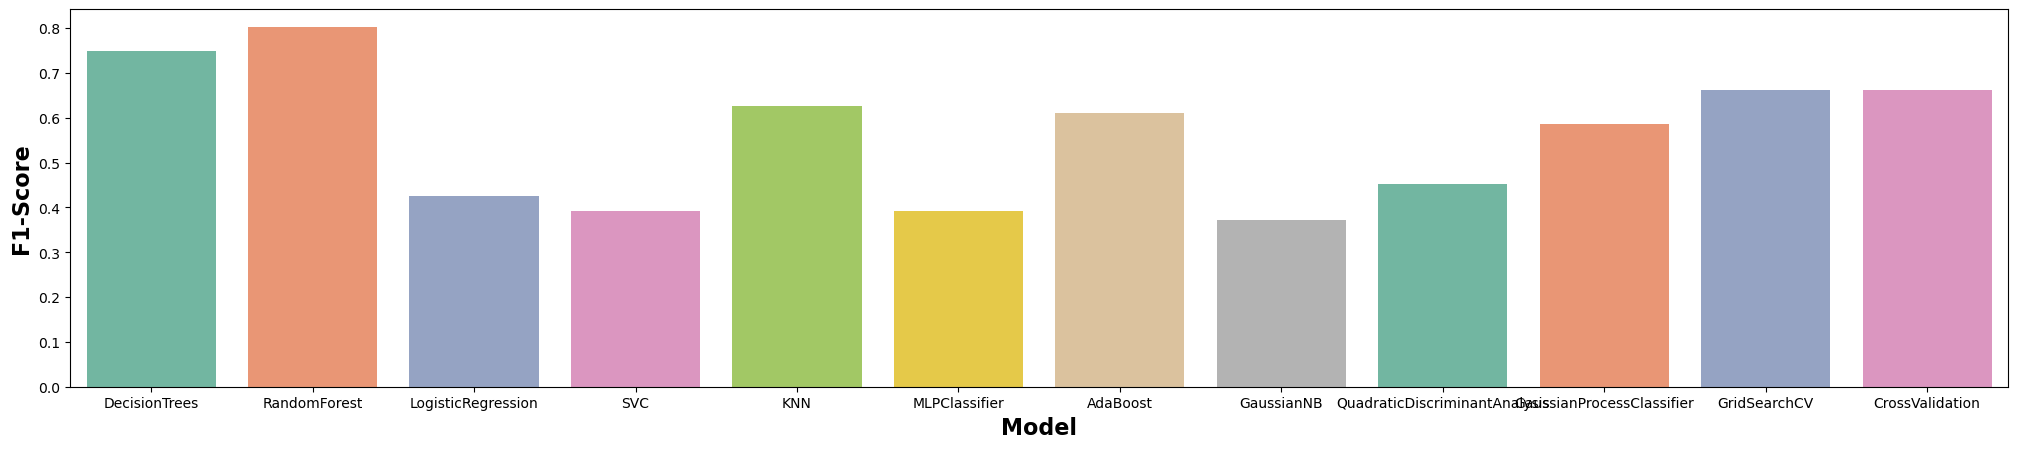

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['F1-Score'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('F1-Score', fontdict={'color':'black', 'weight':'bold', 'size': 16})